# EDA

In [158]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# display multiple outputs, default is 'last_expr' (last expression)
# http://ipython.readthedocs.io/en/stable/config/options/terminal.html
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
import psycopg2 as pg
import seaborn as sns

from psycopg2.extras import execute_values

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.stats import zscore

## Pulling down all the features and take a quick look

In [42]:
query = '''SELECT * FROM prod.features WHERE "Season" != 2018'''

conn = pg.connect(database='postgres',
                  user='postgres',
                  password='w207final',
                  host='35.185.225.167')

df = pd.read_sql_query(query, conn)

In [43]:
df.head()

,Season,DayNum,Team,Opponent,Outcome,Score,OpponentScore,NumOT,WLoc,Season Type,...,ThreePointAttPct_Opponent,FieldGoalAtt_Opponent,TwoPointAtt_Opponent,ThreePointAtt_Opponent,FreeThrowAtt_Opponent,Assists_Opponent,Turnovers_Opponent,Steals_Opponent,Blocks_Opponent,PersonalFouls_Opponent
0,2003,14,1166,1202,1,82,57,0,H,Regular,...,0.254902,51.00,38.00,13.0,11.00,18.0,15.0,7.0,1.0,5.0
1,2003,20,1234,1194,1,79,52,0,H,Regular,...,0.225484,63.75,49.25,14.5,21.75,11.0,16.5,13.0,2.5,27.0
2,2003,20,1105,1435,0,40,68,0,H,Regular,...,0.240000,50.00,38.00,12.0,21.00,21.0,22.0,9.0,4.0,21.0
3,2003,20,1405,1243,1,58,50,0,N,Regular,...,0.153846,52.00,44.00,8.0,31.00,9.0,10.0,6.0,4.0,23.0
4,2003,21,1164,1326,0,51,58,0,H,Regular,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.shape
df.describe().T

(155234, 64)

,count,mean,std,min,25%,50%,75%,max
Season,155234.0,2.010221e+03,4.278759,2003.000000,2007.000000,2010.000000,2014.000000,2017.000000
DayNum,155234.0,7.225313e+01,35.818421,0.000000,40.000000,75.000000,103.000000,154.000000
Team,155234.0,1.284597e+03,104.473843,1101.000000,1194.000000,1283.000000,1376.000000,1464.000000
Opponent,155234.0,1.284597e+03,104.473843,1101.000000,1194.000000,1283.000000,1376.000000,1464.000000
Outcome,155234.0,5.000000e-01,0.500002,0.000000,0.000000,0.500000,1.000000,1.000000
Score,155234.0,6.901533e+01,12.533466,20.000000,60.000000,69.000000,77.000000,144.000000
OpponentScore,155234.0,6.901533e+01,12.533466,20.000000,60.000000,69.000000,77.000000,144.000000
NumOT,155234.0,7.252277e-02,0.314617,0.000000,0.000000,0.000000,0.000000,6.000000
holdout_s1,1962.0,2.731906e-01,0.445712,0.000000,0.000000,0.000000,1.000000,1.000000
holdout_s2,1962.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Score, Win Percentage, & Historical Points Differential

Predictably, winners on average score more than the losers

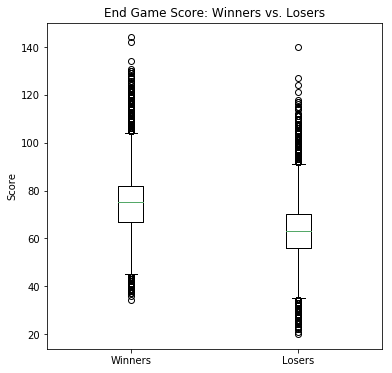

In [142]:
df_winners = df[df.Outcome == 1]
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('End Game Score: Winners vs. Losers')
_ = plt.boxplot([df_winners.Score.dropna(),df_winners.OpponentScore.dropna()])
_ = ax1.set_ylabel('Score')
_ = ax1.set_xticklabels(['Winners','Losers'])

Next, let's look at winning percentage.  This percentage updates after each game played in the season.  Winning percentage is pretty normally distributed except for several noteable spikes.  The spikes in the histogram is caused by the games earlier in the season (i.e. teams losing/winning all of their initial games)

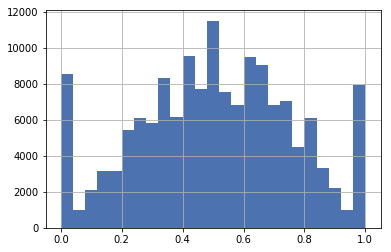

In [105]:
df.WinPct.hist(bins=25)

Since winning by 1 point is not the same as blowing out a team and winning by 20, we also looked at the average point differential.  As you can see in the chart below, a team with > 50% win percentage can still have a negative average point differential if they got blown out the few times they lost.  

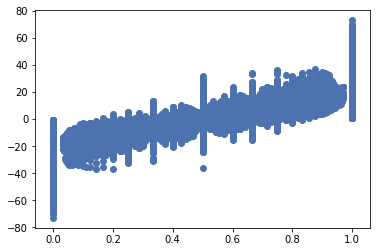

In [88]:
_ = plt.scatter(df.WinPct,df.AvgNetPointsFor)

For win percentage and historical score differential, we have a column for the team's current win percentage and their opponent's current win percentage, and a difference in the win percentages.  We have a similar set up for historical score differential as well.  Since the difference columns is a simple subtraction of the team's stats with the opponent's stats, there's a positive correlation between the team's stats with the difference and a negative correlation between the opponent's stats.

As noted above, there's also a correlation between win percentage and the team's historical points differential.

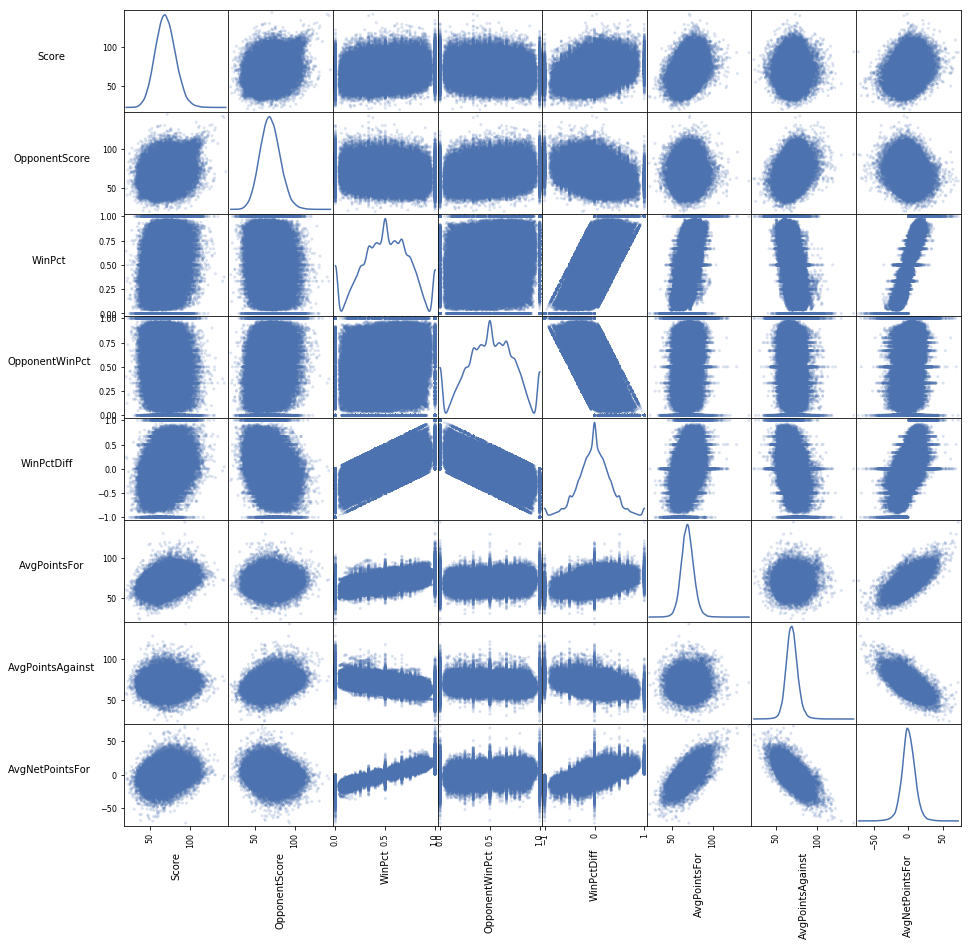

In [117]:
target = ['Outcome']
features = ['Score', 'OpponentScore',
            'WinPct', 'OpponentWinPct', 'WinPctDiff',
            'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor'
           ]

axs = pd.plotting.scatter_matrix(df[features], alpha=0.2, figsize=(15, 15), diagonal='kde')
n = len(df[features].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

Since Score and OpponentScore is the determinant of Outcome, it's natural that they correlate relatively high to Outcome.  Aside from those features, difference in the team's current win percentages and difference in the team's historical point differential seem to be the highest correlated features.

In [124]:
target = ['Outcome']
features = ['Score', 'OpponentScore',
            'WinPct', 'OpponentWinPct', 'WinPctDiff',
            'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor'
           ]

cm = df[target+features].corr()['Outcome'].abs().sort_values(ascending=False)
cm

Outcome             1.000000
OpponentScore       0.477333
Score               0.477333
WinPctDiff          0.395580
AvgNetPointsFor     0.264721
WinPct              0.249926
OpponentWinPct      0.249926
AvgPointsFor        0.193120
AvgPointsAgainst    0.162812
Name: Outcome, dtype: float64

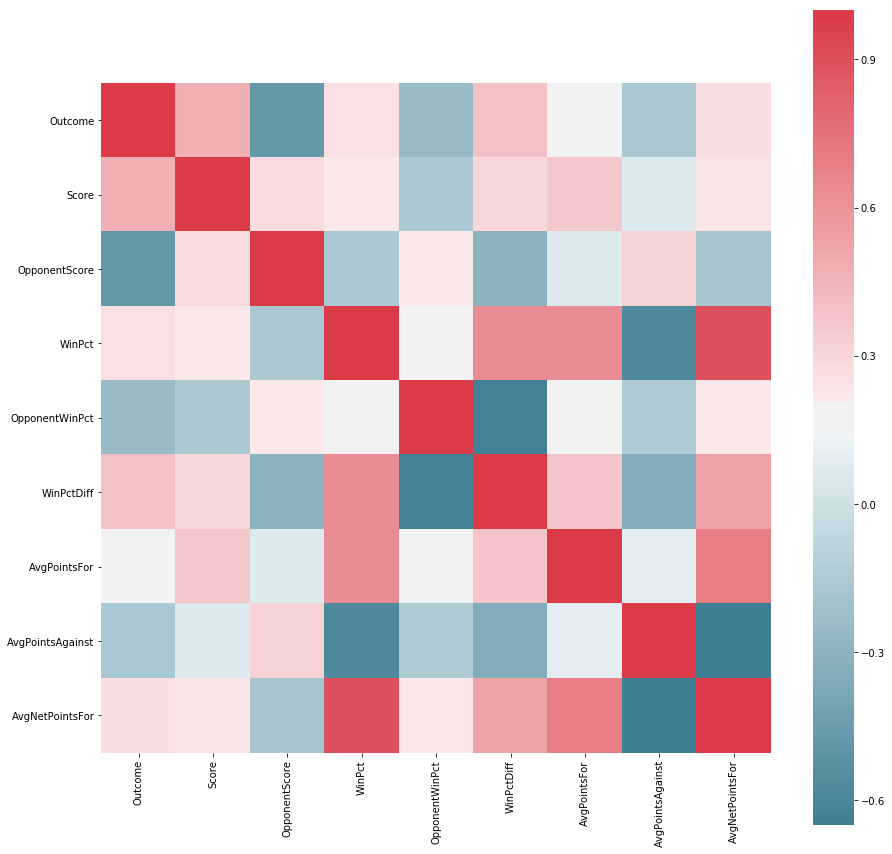

In [119]:
target = ['Outcome']
features = ['Score', 'OpponentScore',
            'WinPct', 'OpponentWinPct', 'WinPctDiff',
            'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor'
           ]

cm = df[target+features].corr()

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, mask=np.zeros_like(cm, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Game Statistics

Kaggle provided statistics about every NCAA division 1 game played between the 2003 and 2018 seasons, inclusive, in the RegSeasonDetailedResults csv file.  

RegSeasonDetailedResults has the following fields.  The 'W' means the winning team, and there is a similar set for the losing team that starts with 'L':

| Field | Meaning |
|:-----------|:------------|
|WFGM|field goals made|
|WFGA|field goals attempted|
|WFGM3|three pointers made|
|WFGA3|three pointers attempted|
|WFTM|free throws made|
|WFTA|free throws attempted|
|WOR|offensive rebounds|
|WDR|defensive rebounds|
|WAst|assists|
|WTO|turnovers committed|
|WStl|steals|
|WBlk|blocks|
|WPF|personal fouls committed|

The RegSeasonDetailedResults data set did not have two point shooting statistics, so this information had to be calculated by subtracting the total number of three point shots from the total number of field goals.

## Game Statistics: 2pt Field Goal Percentage

### Regular Season

In [149]:
df_reg = df[df['Season Type'] == 'Regular']
df_tour = df[df['Season Type'] == 'NCAA Tourney']

df_reg[['TwoPointPct_Team']].describe()

,TwoPointPct_Team
count,148142.000000
mean,0.482409
std,0.047666
min,0.137931
25%,0.454225
50%,0.482926
75%,0.510896
max,0.933333


In [161]:
df_winners = df_reg[df_reg.Outcome == 1]
df_winners[['TwoPointPct_Team', 'TwoPointPct_Opponent']].describe()

,TwoPointPct_Team,TwoPointPct_Opponent
count,74108.000000,74034.000000
mean,0.491336,0.473472
std,0.046648,0.046995
min,0.166667,0.137931
25%,0.463203,0.446472
50%,0.490899,0.474818
75%,0.518255,0.502111
max,0.875000,0.933333


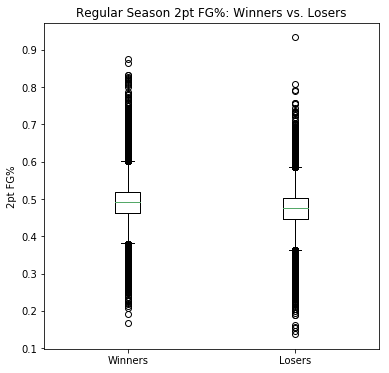

In [160]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Regular Season 2pt FG%: Winners vs. Losers')
_ = plt.boxplot([df_winners.TwoPointPct_Team.dropna(),df_winners.TwoPointPct_Opponent.dropna()])
_ = ax1.set_ylabel('2pt FG%')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [162]:
t, p = ttest_ind(df_winners['TwoPointPct_Team'].dropna(), df_winners['TwoPointPct_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 73.42  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [164]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['TwoPointDifference'] = df_reg['TwoPointPct_Team'] - df_reg['TwoPointPct_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.28


### Tournament

In [165]:
df_tour[['TwoPointPct_Team']].describe()

,TwoPointPct_Team
count,1962.000000
mean,0.512912
std,0.028199
min,0.416329
25%,0.493646
50%,0.511978
75%,0.529598
max,0.603043


In [167]:
df_winners = df_tour[df_tour.Outcome == 1]
df_winners[['TwoPointPct_Team', 'TwoPointPct_Opponent']].describe()

,TwoPointPct_Team,TwoPointPct_Opponent
count,981.000000,981.000000
mean,0.516378,0.509446
std,0.028102,0.027881
min,0.437311,0.416329
25%,0.495627,0.491635
50%,0.514600,0.509035
75%,0.534131,0.525662
max,0.603043,0.603043


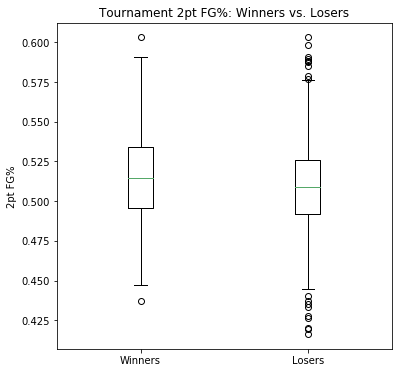

In [168]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Tournament 2pt FG%: Winners vs. Losers')
_ = plt.boxplot([df_winners.TwoPointPct_Team.dropna(),df_winners.TwoPointPct_Opponent.dropna()])
_ = ax1.set_ylabel('2pt FG%')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [169]:
t, p = ttest_ind(df_winners['TwoPointPct_Team'].dropna(), df_winners['TwoPointPct_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 5.48  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [175]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['TwoPointDifference'] = df_tour['TwoPointPct_Team'] - df_tour['TwoPointPct_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.18


### Regular Season vs. Tournament

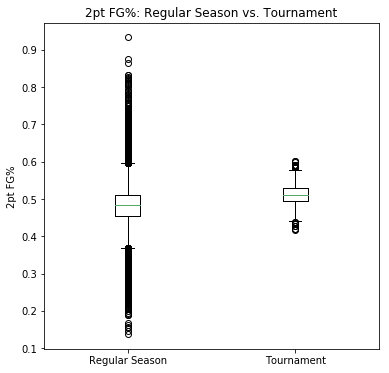

In [176]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('2pt FG%: Regular Season vs. Tournament')
_ = plt.boxplot([df_reg.TwoPointPct_Team.dropna(),df_tour.TwoPointPct_Team.dropna()])
_ = ax1.set_ylabel('2pt FG%')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean two point shooting percent for the regular season is 48.2% whereas the mean two point shooting percent in the tournament is 51.3%, so the two point shooting percentage is better for tournament teams, which makes sense.  Not only is the mean higher, the variance is also much smaller.

For the regular season, the difference between the mean two point shooting percentage of winning teams (49.1%) v. losing teams (47.3%) is about 2%, and is statistically significant.  The correlation between the difference of the two point shooting of the teams and the outcome of the game (win/lose) is 0.28, which indicates a weak linear relationship.

For the tournament, the difference between the mean two point shooting percentage of winning teams (51.6%) v. losing teams (50.9%) is about 0.7%, which is small, but it is statistically significant.  The correlation between the difference between the two point shooting of the teams and the outcome of the game (win/lose) is 0.18, which indicates a very weak linear relationship.

## Game Statistics: 3pt Field Goal Percentage

### Regular Season

In [177]:
df_reg[['ThreePointPct_Team']].describe()

,ThreePointPct_Team
count,148142.000000
mean,0.341386
std,0.048378
min,0.000000
25%,0.314742
50%,0.342090
75%,0.369350
max,0.777778


In [178]:
df_winners = df_reg[df_reg.Outcome == 1]
df_winners[['ThreePointPct_Team', 'ThreePointPct_Opponent']].describe()

,ThreePointPct_Team,ThreePointPct_Opponent
count,74108.000000,74034.000000
mean,0.346192,0.336575
std,0.047837,0.048439
min,0.000000,0.000000
25%,0.319567,0.309940
50%,0.346624,0.337401
75%,0.373706,0.364711
max,0.777778,0.750000


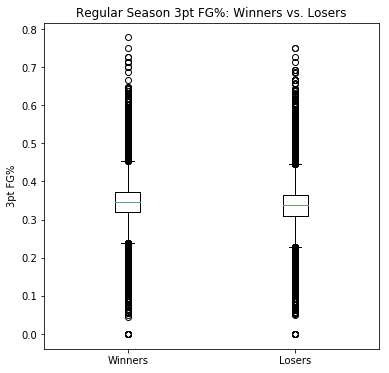

In [179]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Regular Season 3pt FG%: Winners vs. Losers')
_ = plt.boxplot([df_winners.ThreePointPct_Team.dropna(),df_winners.ThreePointPct_Opponent.dropna()])
_ = ax1.set_ylabel('3pt FG%')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [180]:
t, p = ttest_ind(df_winners['ThreePointPct_Team'].dropna(), df_winners['ThreePointPct_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 38.45  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [181]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['ThreePointDifference'] = df_reg['ThreePointPct_Team'] - df_reg['ThreePointPct_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.15


### Tournament

In [182]:
df_tour[['ThreePointPct_Team']].describe()

,ThreePointPct_Team
count,1962.000000
mean,0.362354
std,0.026914
min,0.262246
25%,0.343863
50%,0.362300
75%,0.380551
max,0.451144


In [183]:
df_winners = df_tour[df_tour.Outcome == 1]
df_winners[['ThreePointPct_Team', 'ThreePointPct_Opponent']].describe()

,ThreePointPct_Team,ThreePointPct_Opponent
count,981.000000,981.000000
mean,0.363691,0.361018
std,0.026325,0.027440
min,0.262246,0.262246
25%,0.345632,0.342500
50%,0.362941,0.361259
75%,0.382606,0.379442
max,0.434708,0.451144


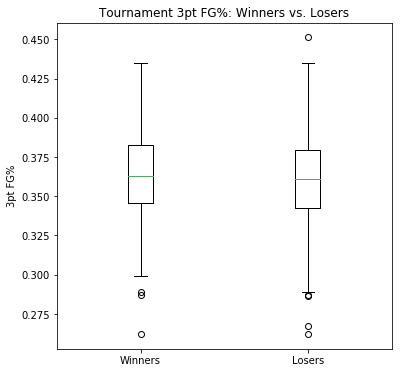

In [184]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Tournament 3pt FG%: Winners vs. Losers')
_ = plt.boxplot([df_winners.ThreePointPct_Team.dropna(),df_winners.ThreePointPct_Opponent.dropna()])
_ = ax1.set_ylabel('3pt FG%')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [185]:
t, p = ttest_ind(df_winners['ThreePointPct_Team'].dropna(), df_winners['ThreePointPct_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 2.20  p = 0.0278


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [186]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['ThreePointDifference'] = df_tour['ThreePointPct_Team'] - df_tour['ThreePointPct_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.07


### Regular Season vs. Tournament

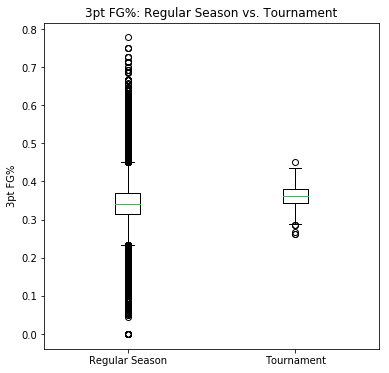

In [187]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('3pt FG%: Regular Season vs. Tournament')
_ = plt.boxplot([df_reg.ThreePointPct_Team.dropna(),df_tour.ThreePointPct_Team.dropna()])
_ = ax1.set_ylabel('3pt FG%')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean three point shooting in the regular season is 34.1% and it is 36.2% during the tournament, so the three point shooting percentage is better for tournament teams, which makes sense. Not only is the mean higher, the variance is also much smaller.

During the regular season, there is less than a 1% difference between the three point shooting of winning and losing teams, and the difference is statistically significant.  The correlation between the difference in team's three point shooting and the outcome of the game has a correlation of 0.15, which is weakly correlated.

During the tournament, there is a 0.2% difference between the three point shooting of winning and losing teams, and the difference is NOT statistically significant.  The correlation between the difference in team's three point shooting and the outcome of the game has a correlation of 0.07, which is very weakly correlated.

Because of the lack of correlation between three point shooting and the outcome of games, this feature will provide little benefit to the model.

## Game Statistics: Free Throw Percentage

### Regular Season

In [188]:
df_reg[['FreeThrowPct_Team']].describe()

,FreeThrowPct_Team
count,148142.000000
mean,0.682886
std,0.056036
min,0.000000
25%,0.651078
50%,0.685591
75%,0.717949
max,1.000000


In [189]:
df_winners = df_reg[df_reg.Outcome == 1]
df_winners[['FreeThrowPct_Team', 'FreeThrowPct_Opponent']].describe()

,FreeThrowPct_Team,FreeThrowPct_Opponent
count,74108.000000,74034.000000
mean,0.686805,0.678964
std,0.054181,0.057566
min,0.000000,0.000000
25%,0.655362,0.647058
50%,0.689087,0.681768
75%,0.720997,0.714623
max,1.000000,1.000000


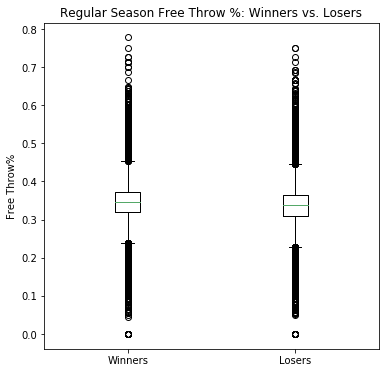

In [190]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Regular Season Free Throw %: Winners vs. Losers')
_ = plt.boxplot([df_winners.ThreePointPct_Team.dropna(),df_winners.ThreePointPct_Opponent.dropna()])
_ = ax1.set_ylabel('Free Throw%')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [191]:
t, p = ttest_ind(df_winners['FreeThrowPct_Team'].dropna(), df_winners['FreeThrowPct_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 27.00  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [192]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['FreeThrowDifference'] = df_reg['FreeThrowPct_Team'] - df_reg['FreeThrowPct_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.10


### Tournament

In [193]:
df_tour[['FreeThrowPct_Team']].describe()

,FreeThrowPct_Team
count,1962.000000
mean,0.703727
std,0.037091
min,0.580619
25%,0.679251
50%,0.701993
75%,0.728992
max,0.816726


In [194]:
df_winners = df_tour[df_tour.Outcome == 1]
df_winners[['FreeThrowPct_Team', 'FreeThrowPct_Opponent']].describe()

,FreeThrowPct_Team,FreeThrowPct_Opponent
count,981.000000,981.000000
mean,0.704863,0.702590
std,0.037246,0.036919
min,0.587035,0.580619
25%,0.681387,0.676196
50%,0.702317,0.701952
75%,0.730715,0.727466
max,0.816726,0.816726


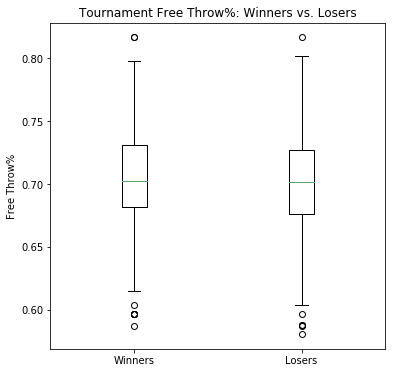

In [196]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Tournament Free Throw%: Winners vs. Losers')
_ = plt.boxplot([df_winners.FreeThrowPct_Team.dropna(),df_winners.FreeThrowPct_Opponent.dropna()])
_ = ax1.set_ylabel('Free Throw%')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [197]:
t, p = ttest_ind(df_winners['FreeThrowPct_Team'].dropna(), df_winners['FreeThrowPct_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 1.36  p = 0.1749


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [198]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['FreeThrowDifference'] = df_tour['FreeThrowPct_Team'] - df_tour['FreeThrowPct_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.04


### Regular Season vs. Tournament

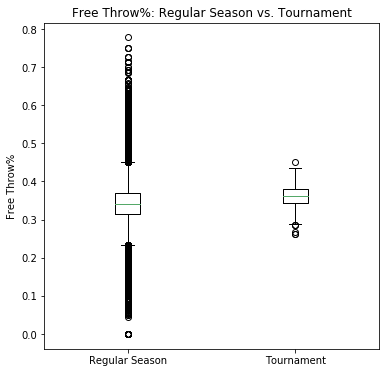

In [199]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Free Throw%: Regular Season vs. Tournament')
_ = plt.boxplot([df_reg.ThreePointPct_Team.dropna(),df_tour.ThreePointPct_Team.dropna()])
_ = ax1.set_ylabel('Free Throw%')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean free throw shooting percent for the regular season is 68.3% whereas the mean two point shooting percent in the tournament is 70.4%, so the free throw shooting percentage is better for tournament teams, which makes sense.  Not only is the mean higher, the variance is also much smaller.

For the regular season, the difference between the mean free throw shooting percentage of winning teams (68.7%) v. losing teams (67.9%) is about 0.8%, and is statistically significant. The correlation between the free throw shooting of the teams and the outcome of the game (win/lose) is 0.10, which indicates a very weak linear relationship.

For the tournament, the difference between the mean free throw shooting percentage of winning teams (70.5%) v. losing teams (70.3%) is about 0.2%, which is small and it is statistically insignificant (p=0.1749). The correlation between the free throw shooting of the teams and the outcome of the game (win/lose) is 0.04, which indicates no linear relationship.

## Game Statistics: Offensive Rebounds

### Regular Season

In [200]:
df_reg[['OffensiveRebounds_Team']].describe()

,OffensiveRebounds_Team
count,148142.000000
mean,11.434332
std,2.242420
min,1.000000
25%,10.000000
50%,11.388889
75%,12.750000
max,32.000000


In [201]:
df_winners = df_reg[df_reg.Outcome == 1]
df_winners[['OffensiveRebounds_Team', 'OffensiveRebounds_Opponent']].describe()

,OffensiveRebounds_Team,OffensiveRebounds_Opponent
count,74108.000000,74034.000000
mean,11.565193,11.303340
std,2.264369,2.212508
min,1.000000,1.000000
25%,10.148148,9.920769
50%,11.500000,11.275862
75%,12.875000,12.625000
max,32.000000,29.000000


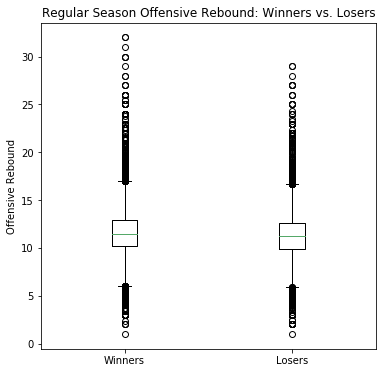

In [202]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Regular Season Offensive Rebound: Winners vs. Losers')
_ = plt.boxplot([df_winners.OffensiveRebounds_Team.dropna(),df_winners.OffensiveRebounds_Opponent.dropna()])
_ = ax1.set_ylabel('Offensive Rebound')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [203]:
t, p = ttest_ind(df_winners['OffensiveRebounds_Team'].dropna(), df_winners['OffensiveRebounds_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 22.51  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [204]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['OffensiveReboundDifference'] = df_reg['OffensiveRebounds_Team'] - df_reg['OffensiveRebounds_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.09


### Tournament

In [205]:
df_tour[['OffensiveRebounds_Team']].describe()

,OffensiveRebounds_Team
count,1962.000000
mean,11.761077
std,1.809222
min,5.468750
25%,10.562231
50%,11.762121
75%,12.966379
max,17.032258


In [206]:
df_winners = df_tour[df_tour.Outcome == 1]
df_winners[['OffensiveRebounds_Team', 'OffensiveRebounds_Opponent']].describe()

,OffensiveRebounds_Team,OffensiveRebounds_Opponent
count,981.000000,981.000000
mean,11.973195,11.548960
std,1.825472,1.768468
min,5.468750,5.468750
25%,10.806452,10.387097
50%,11.878788,11.551724
75%,13.322581,12.700000
max,17.032258,17.032258


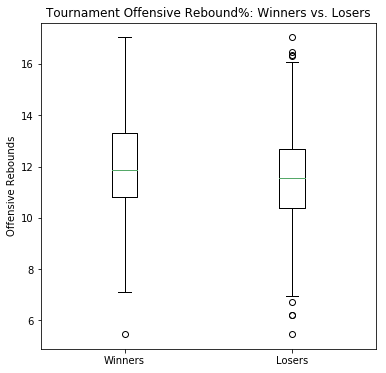

In [207]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Tournament Offensive Rebound%: Winners vs. Losers')
_ = plt.boxplot([df_winners.OffensiveRebounds_Team.dropna(),df_winners.OffensiveRebounds_Opponent.dropna()])
_ = ax1.set_ylabel('Offensive Rebounds')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [208]:
t, p = ttest_ind(df_winners['OffensiveRebounds_Team'].dropna(), df_winners['OffensiveRebounds_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 5.23  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [209]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['OffensiveReboundDifference'] = df_tour['OffensiveRebounds_Team'] - df_tour['OffensiveRebounds_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.17


### Regular Season vs. Tournament

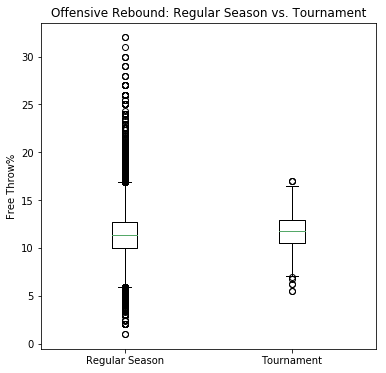

In [210]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Offensive Rebound: Regular Season vs. Tournament')
_ = plt.boxplot([df_reg.OffensiveRebounds_Team.dropna(),df_tour.OffensiveRebounds_Team.dropna()])
_ = ax1.set_ylabel('Free Throw%')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean offensive rebounds for the regular season is 11.4 whereas the mean offensive rebounds in the tournament is 11.8.  The variance is also smaller.  

For the regular season, the difference between the mean offensive rebounding of winning teams (11.6) v. losing teams (11.3) is about 0.3, and is statistically significant.  The correlation between the offensive rebounding of the teams and the outcome of the game (win/lose) is 0.09, which indicates minimal linear relationship.

For the tournament, the difference between the mean offensive rebounding of winning teams (12.0) v. losing teams (11.5) is about 0.5, and is statistically significant.  The correlation between the offensive rebounding of the teams and the outcome of the game (win/lose) is 0.17, which indicates some linear relationship.

## Game Statistics: Defensive Rebounds

### Regular Season

In [211]:
df_reg[['DefensiveRebounds_Team']].describe()

,DefensiveRebounds_Team
count,148142.000000
mean,23.697589
std,2.734722
min,6.000000
25%,22.000000
50%,23.590909
75%,25.272727
max,48.000000


In [212]:
df_winners = df_reg[df_reg.Outcome == 1]
df_winners[['DefensiveRebounds_Team', 'DefensiveRebounds_Opponent']].describe()

,DefensiveRebounds_Team,DefensiveRebounds_Opponent
count,74108.000000,74034.000000
mean,24.029416,23.365430
std,2.776296,2.651209
min,8.000000,6.000000
25%,22.266667,21.700000
50%,23.913043,23.275862
75%,25.608696,24.937500
max,48.000000,48.000000


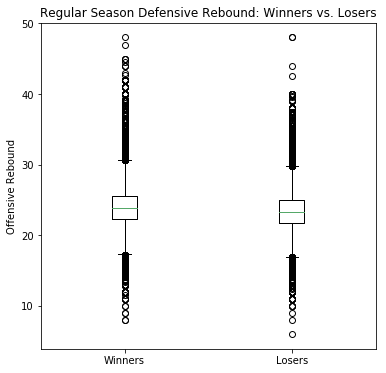

In [213]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Regular Season Defensive Rebound: Winners vs. Losers')
_ = plt.boxplot([df_winners.DefensiveRebounds_Team.dropna(),df_winners.DefensiveRebounds_Opponent.dropna()])
_ = ax1.set_ylabel('Offensive Rebound')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [214]:
t, p = ttest_ind(df_winners['DefensiveRebounds_Team'].dropna(), df_winners['DefensiveRebounds_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 47.07  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [215]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['DefensiveReboundDifference'] = df_reg['DefensiveRebounds_Team'] - df_reg['DefensiveRebounds_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.19


### Tournament

In [216]:
df_tour[['DefensiveRebounds_Team']].describe()

,DefensiveRebounds_Team
count,1962.000000
mean,24.740825
std,1.855590
min,15.370370
25%,23.521860
50%,24.678710
75%,25.939394
max,30.968750


In [217]:
df_winners = df_tour[df_tour.Outcome == 1]
df_winners[['DefensiveRebounds_Team', 'DefensiveRebounds_Opponent']].describe()

,DefensiveRebounds_Team,DefensiveRebounds_Opponent
count,981.000000,981.000000
mean,24.925800,24.555850
std,1.869116,1.824240
min,19.892857,15.370370
25%,23.645161,23.366667
50%,24.968750,24.533333
75%,26.187500,25.714286
max,30.968750,30.968750


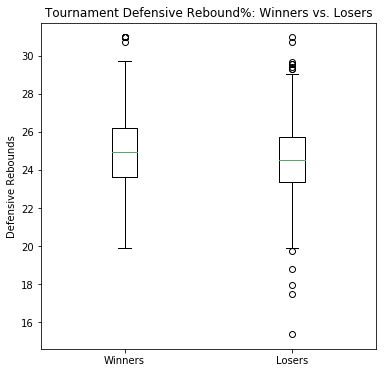

In [218]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Tournament Defensive Rebound%: Winners vs. Losers')
_ = plt.boxplot([df_winners.DefensiveRebounds_Team.dropna(),df_winners.DefensiveRebounds_Opponent.dropna()])
_ = ax1.set_ylabel('Defensive Rebounds')
_ = ax1.set_xticklabels(['Winners','Losers'])

#### Two Independent Samples T-Test

In [219]:
t, p = ttest_ind(df_winners['DefensiveRebounds_Team'].dropna(), df_winners['DefensiveRebounds_Opponent'].dropna(), equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

ttest_ind: t = 4.44  p = 0.0000


#### Correlation Between (TwoPointPct_Team - TwoPointPct_Opponent) and Outcome

In [220]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['DefensiveReboundDifference'] = df_tour['DefensiveRebounds_Team'] - df_tour['DefensiveRebounds_Opponent']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.15


### Regular Season vs. Tournament

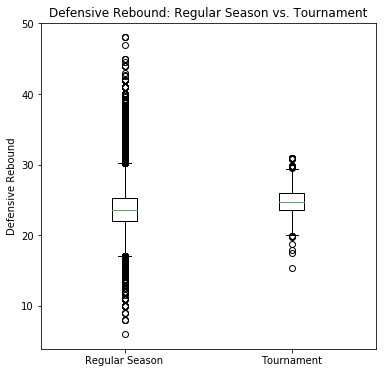

In [222]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Defensive Rebound: Regular Season vs. Tournament')
_ = plt.boxplot([df_reg.DefensiveRebounds_Team.dropna(),df_tour.DefensiveRebounds_Team.dropna()])
_ = ax1.set_ylabel('Defensive Rebound')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean defensive rebounds for the regular season is 23.7 whereas the mean defensive rebounds in the tournament is 24.7, so the defensive rebounding is better for tournament teams, which makes sense.

For the regular season, the difference between the mean defensive rebounding of winning teams (24.0) v. losing teams (23.4) is about 0.6, and is statistically significant.  The correlation between the defensive rebounding of the teams and the outcome of the game (win/lose) is 0.19, which indicates a weak linear relationship.

For the tournament, the difference between the mean defensive rebounding of winning teams (24.9) v. losing teams (24.6) is about 0.3, and is statistically significant.  The correlation between the defensive rebounding of the teams and the outcome of the game (win/lose) is 0.15, which is a weak linear relationship.

### Game Statistic Relationships

There does not to be a relationship between these game statistics

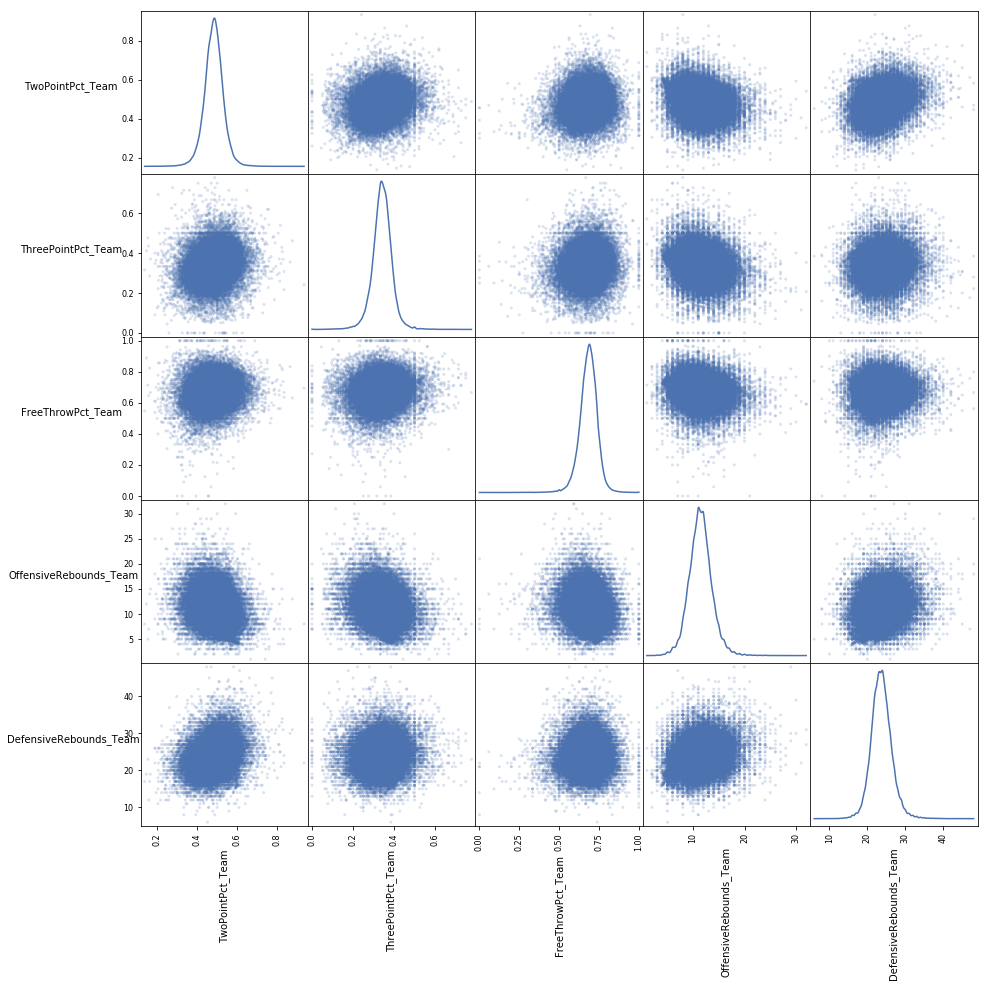

In [223]:
target = ['Outcome']
features = ['TwoPointPct_Team', 'ThreePointPct_Team',
            'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team',
           ]

axs = pd.plotting.scatter_matrix(df[features], alpha=0.2, figsize=(15, 15), diagonal='kde')
n = len(df[features].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

## Ranking Systems

Although the median rank for tournament games are much lower (24 vs. 167), there are definitely some lower ranked teams making it into the tournament.

In [227]:
df_reg[['AvgRank']].describe()
df_tour[['AvgRank']].describe()

,AvgRank
count,145946.000000
mean,167.646891
std,96.521477
min,1.000000
25%,84.203925
50%,166.500000
75%,250.490000
max,350.868000


,AvgRank
count,1962.000000
mean,39.561237
std,46.695648
min,1.112900
25%,11.186700
50%,23.772700
75%,44.931000
max,278.980000


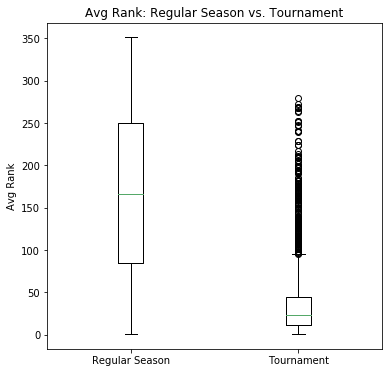

In [228]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Avg Rank: Regular Season vs. Tournament')
_ = plt.boxplot([df_reg.AvgRank.dropna(),df_tour.AvgRank.dropna()])
_ = ax1.set_ylabel('Avg Rank')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

Rank difference is negatively correlated with the outcome since the lower the rank the better the teams are.

In [226]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['AvgRankDifference'] = df_reg['AvgRank'] - df_reg['OpponentAvgRank']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: -0.48


In [224]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['AvgRankDifference'] = df_tour['AvgRank'] - df_tour['OpponentAvgRank']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: -0.47


## Seed

Looking at the tournament games, the winners tend to have lower seeds and the correlation to the outcome is relatively high at -0.5.

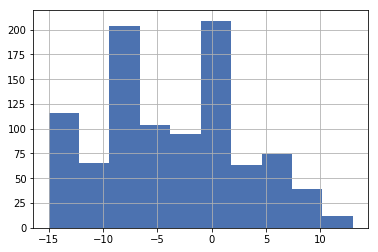

In [89]:
df_winners.SeedDiff.hist()

In [229]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['SeedDiff'] = df_tour['SeedDiff']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: -0.50


When there's a difference in seed, the higher seed team win 72% of the time

In [231]:
df_winners = df_tour[df_tour.Outcome == 1]
wins = len(df_winners[df_winners.SeedDiff<0])
losses = len(df_winners[df_winners.SeedDiff>0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

72%


Instead of just looking at whether or not a seed is higher, let's look at the actual difference between the seed.  In the chart below, it does look like the larger the seed difference, the win percentage does also go up.  There is an odd drop at seed diff = 10 though.  It's likely due to the low sample size (only 8 games with seed diff of 10).

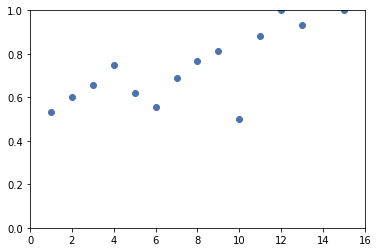

In [233]:
diff_summary = pd.DataFrame(columns=['SeedDiff','WinPercentage','GameCount'])

for diff in range(1,16):
    wins = len(df_winners[df_winners.SeedDiff==-diff])
    losses = len(df_winners[df_winners.SeedDiff==diff])
    if wins+losses != 0:
        temp_df = pd.DataFrame([[diff, 1.*wins/(wins+losses),wins+losses]],columns=['SeedDiff','WinPercentage','GameCount'])
        diff_summary = diff_summary.append(temp_df)

_ = plt.axis((0,16,0,1))
_ = plt.scatter(diff_summary.SeedDiff,diff_summary.WinPercentage)

## Historical Tournament Wins (Legacy)

Number of historical tournament wins ranges from 90 to 0

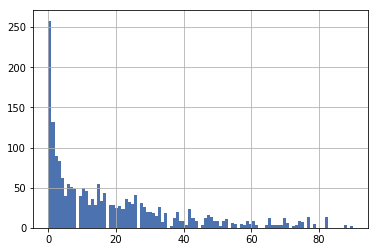

In [237]:
df_tour.TourWins.hist(bins=100)

35% of the regular season games the two teams have the same tour wins, so this feature may not be as useful in regular season games

In [244]:
print 1.0 * len(df_reg[(df_reg.TourWinsDiff==0) & (df_reg.Season!=1985)])/len(df_reg[df_reg.Season!=1985])

0.345738295318


4% of the tournament games the two teams have the same tour wins, so this feature should be useful for tournament games

In [243]:
print 1.0 * len(df_tour[(df_tour.TourWinsDiff==0) & (df_tour.Season!=1985)])/len(df_tour[df_tour.Season!=1985])

0.0428134556575


The correlation between historical tour wins with regular season games is 0.24 and the same for tournament games is 0.39.

In [246]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['TourWinsDiff'] = df_reg['TourWinsDiff']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.24


In [245]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['TourWinsDiff'] = df_tour['TourWinsDiff']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.39


Teams with more historical tour wins have 70% of winning

In [248]:
df_winners = df_tour[df_tour.Outcome == 1]
wins = len(df_winners[df_winners.TourWinsDiff>0])
losses = len(df_winners[df_winners.TourWinsDiff<0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

70%


The bigger the difference in historical tournament wins, the bigger the chance the team with better legacy will win.  For example, if team A has 30 more historical tournament wins than their opponent, they will have 80.8% chance of winning.

In [250]:
def winPercentageByTourWinDiff(tWinDiff):
    wins = len(df_winners[df_winners.TourWinsDiff>tWinDiff])
    losses = len(df_winners[df_winners.TourWinsDiff<-tWinDiff])
    return 1.*wins/(wins+losses), wins+losses

tourwin_diff_summary = pd.DataFrame(columns=['TourWinDiff','WinPercentage','GameCount'])
win_diff_list = [0,5,10,15,20,25,30,35,40,45,50,55,60,70,75]
for d in win_diff_list:
    temp_df = pd.DataFrame([[d, winPercentageByTourWinDiff(d)[0], winPercentageByTourWinDiff(d)[1]]],columns=['TourWinDiff','WinPercentage','GameCount'])
    tourwin_diff_summary = tourwin_diff_summary.append(temp_df)
    
tourwin_diff_summary

,TourWinDiff,WinPercentage,GameCount
0,0,0.698616,939
0,5,0.714653,778
0,10,0.740032,627
0,15,0.746562,509
0,20,0.761084,406
0,25,0.790476,315
0,30,0.808163,245
0,35,0.813472,193
0,40,0.807453,161
0,45,0.827869,122


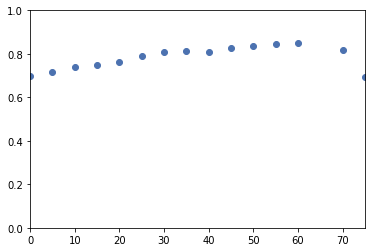

In [251]:
_ = plt.axis((0,75,0,1))
_ = plt.scatter(tourwin_diff_summary.TourWinDiff,tourwin_diff_summary.WinPercentage)

## Historical Wins vs. Opponent

This feature looks at historical win percentage with the particular opponent.  In regular season, the historical win percentage with opponent is 0.25, and in the tournament, the correlation is lower at 0.20.

In [252]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['cum_winpct_v_opp'] = df_reg['cum_winpct_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.25


In [253]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['cum_winpct_v_opp'] = df_tour['cum_winpct_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0,1])

The correlation is: 0.20


## Un-used, will be removed before final

In [18]:
df.columns

Index([u'Season', u'DayNum', u'Team', u'Opponent', u'Outcome', u'Score',
       u'OpponentScore', u'NumOT', u'WLoc', u'Season Type', u'holdout_s1',
       u'holdout_s2', u'AvgRank', u'OpponentAvgRank', u'TwoPointPct_Team',
       u'ThreePointPct_Team', u'FreeThrowPct_Team', u'OffensiveRebounds_Team',
       u'DefensiveRebounds_Team', u'TwoPointPct_Opponent',
       u'ThreePointPct_Opponent', u'FreeThrowPct_Opponent',
       u'OffensiveRebounds_Opponent', u'DefensiveRebounds_Opponent', u'WinPct',
       u'OpponentWinPct', u'WinPctDiff', u'AvgPointsFor', u'AvgPointsAgainst',
       u'AvgNetPointsFor', u'SeedDiff', u'OpponentAvgPointsFor',
       u'OpponentAvgPointsAgainst', u'OpponentAvgNetPointsFor', u'TourWins',
       u'OpponentTourWins', u'TourWinsDiff', u'cum_wins_v_opp',
       u'cum_games_v_opp', u'cum_winpct_v_opp', u'FieldGoalPct_Team',
       u'TwoPointAttPct_Team', u'ThreePointAttPct_Team', u'FieldGoalAtt_Team',
       u'TwoPointAtt_Team', u'ThreePointAtt_Team', u'FreeThrowAtt

In [80]:
# using bloxplot instead of histgram
#df_winners = df[df.Outcome == 1]
#_ = plt.style.use('seaborn-deep')
#_ = plt.hist([df_winners.Score,df_winners.OpponentScore], bins = 20, label=['Winner','Loser'])
#_ = plt.legend(loc='upper right')
#_ = plt.show()

## Relationship between All Features and Target (some clean-up to do)

Looking across all the features...

Here are the top features that correlate with a regular season win...
| Field | Correlation |
|:-----------|:------------|
|WinPctDiff|0.396641|
|OpponentAvgRank|0.268173|
|AvgRank|0.268173|
|AvgNetPointsFor|0.266428|
|OpponentAvgNetPointsFor|0.266428|
|OpponentWinPct|0.252097|
|WinPct|0.252097|
|cum_winpct_v_opp|0.247859|
|TourWinsDiff|0.237438|
|FieldGoalPct_Team |0.196458|          

Here are the top features that correlate with a tournament win...
| Field | Correlation |
|:-----------|:------------|
|SeedDiff|0.496188|
|TourWinsDiff|0.386137|
|WinPctDiff|0.351707|
|AvgRank|0.321558|
|OpponentAvgRank|0.321558|
|AvgNetPointsFor|0.308995|
|OpponentAvgNetPointsFor|0.308995|
|OpponentTourWins|0.277334|
|TourWins|0.277334|
|WinPct|0.251566|    

In [260]:
target = ['Outcome']
features = ['Season Type', 'AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
       'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
       'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
       'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
       'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
       'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
       'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
       'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
       'OpponentTourWins', 'TourWinsDiff', 'cum_wins_v_opp',
       'cum_games_v_opp', 'cum_winpct_v_opp', 'FieldGoalPct_Team',
       'TwoPointAttPct_Team', 'ThreePointAttPct_Team', 'FieldGoalAtt_Team',
       'TwoPointAtt_Team', 'ThreePointAtt_Team', 'FreeThrowAtt_Team',
       'Assists_Team', 'Turnovers_Team', 'Steals_Team', 'Blocks_Team',
       'PersonalFouls_Team', 'FieldGoalPct_Opponent',
       'TwoPointAttPct_Opponent', 'ThreePointAttPct_Opponent',
       'FieldGoalAtt_Opponent', 'TwoPointAtt_Opponent',
       'ThreePointAtt_Opponent', 'FreeThrowAtt_Opponent',
       'Assists_Opponent', 'Turnovers_Opponent', 'Steals_Opponent',
       'Blocks_Opponent', 'PersonalFouls_Opponent'
           ]

cm = df_reg[target+features].corr()['Outcome'].abs().sort_values(ascending=False)
cm.head(11)

Outcome                    1.000000
WinPctDiff                 0.396641
OpponentAvgRank            0.268173
AvgRank                    0.268173
AvgNetPointsFor            0.266428
OpponentAvgNetPointsFor    0.266428
OpponentWinPct             0.252097
WinPct                     0.252097
cum_winpct_v_opp           0.247859
TourWinsDiff               0.237438
FieldGoalPct_Team          0.196458
Name: Outcome, dtype: float64

In [261]:
target = ['Outcome']
features = ['Season Type', 'AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team',
       'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team',
       'DefensiveRebounds_Team', 'TwoPointPct_Opponent',
       'ThreePointPct_Opponent', 'FreeThrowPct_Opponent',
       'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'WinPct',
       'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst',
       'AvgNetPointsFor', 'SeedDiff', 'OpponentAvgPointsFor',
       'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins',
       'OpponentTourWins', 'TourWinsDiff', 'cum_wins_v_opp',
       'cum_games_v_opp', 'cum_winpct_v_opp', 'FieldGoalPct_Team',
       'TwoPointAttPct_Team', 'ThreePointAttPct_Team', 'FieldGoalAtt_Team',
       'TwoPointAtt_Team', 'ThreePointAtt_Team', 'FreeThrowAtt_Team',
       'Assists_Team', 'Turnovers_Team', 'Steals_Team', 'Blocks_Team',
       'PersonalFouls_Team', 'FieldGoalPct_Opponent',
       'TwoPointAttPct_Opponent', 'ThreePointAttPct_Opponent',
       'FieldGoalAtt_Opponent', 'TwoPointAtt_Opponent',
       'ThreePointAtt_Opponent', 'FreeThrowAtt_Opponent',
       'Assists_Opponent', 'Turnovers_Opponent', 'Steals_Opponent',
       'Blocks_Opponent', 'PersonalFouls_Opponent'
           ]

cm = df_tour[target+features].corr()['Outcome'].abs().sort_values(ascending=False)
cm.head(11)

Outcome                    1.000000
SeedDiff                   0.496188
TourWinsDiff               0.386137
WinPctDiff                 0.351707
AvgRank                    0.321558
OpponentAvgRank            0.321558
AvgNetPointsFor            0.308995
OpponentAvgNetPointsFor    0.308995
OpponentTourWins           0.277334
TourWins                   0.277334
WinPct                     0.251566
Name: Outcome, dtype: float64

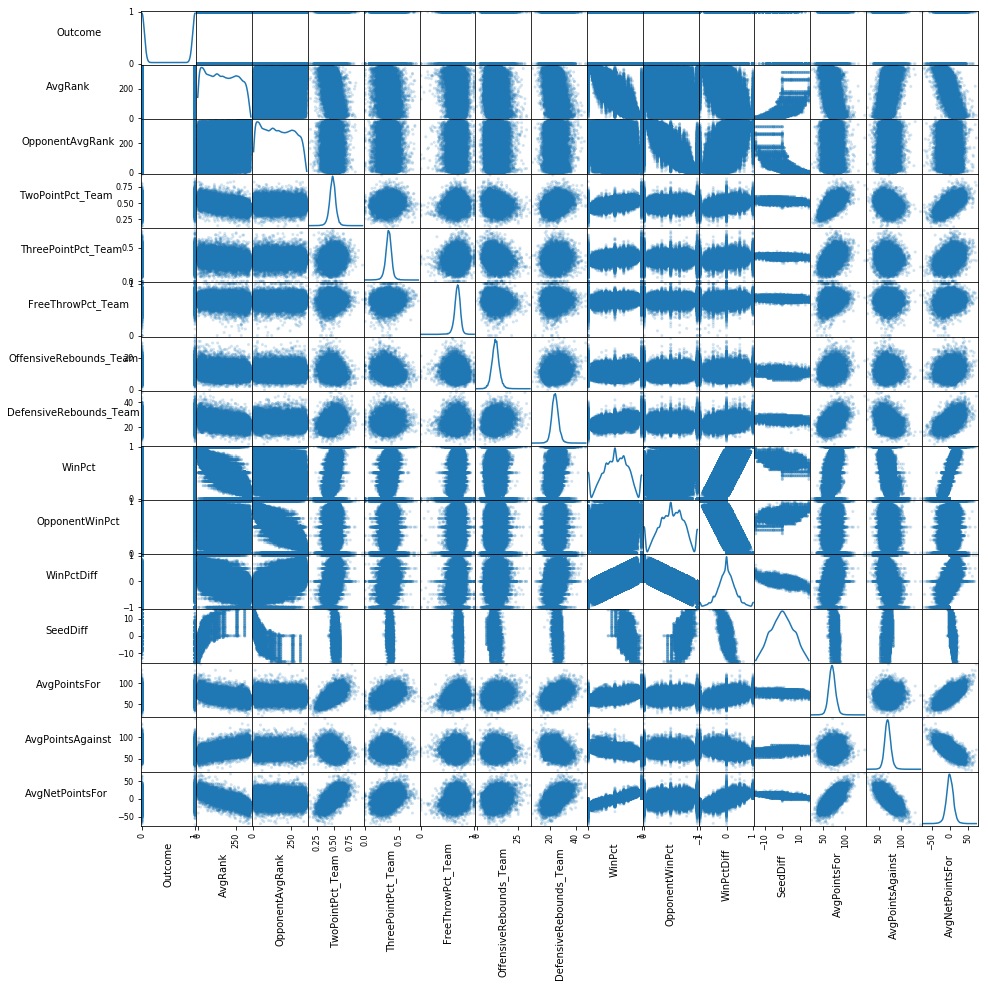

In [14]:
target = ['Outcome']
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team', 'ThreePointPct_Team',
            'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team',
            'WinPct', 'OpponentWinPct', 'WinPctDiff', 'SeedDiff',
            'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor'
           ]

axs = pd.plotting.scatter_matrix(df[target+features], alpha=0.2, figsize=(15, 15), diagonal='kde')
n = len(df[target+features].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

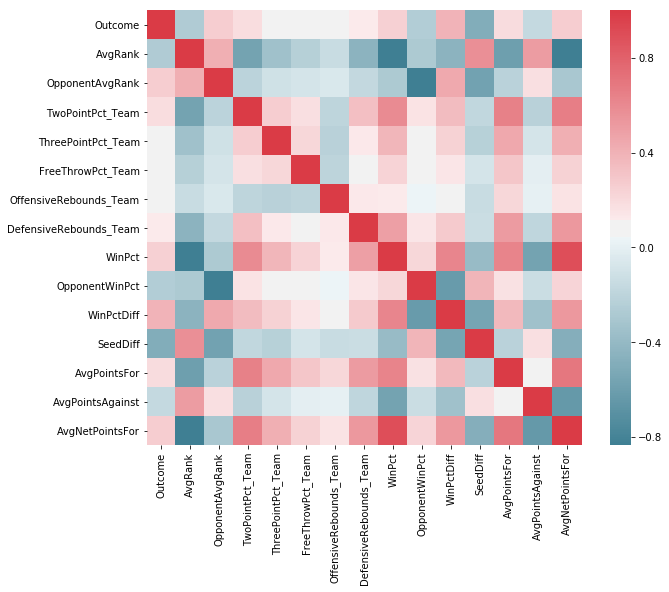

In [15]:
target = ['Outcome']
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team', 'ThreePointPct_Team',
            'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team',
            'WinPct', 'OpponentWinPct', 'WinPctDiff', 'SeedDiff',
            'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor'
           ]

cm = df[target+features].corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, mask=np.zeros_like(cm, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)